<div style="float:left">
            <h1 style="width:450px">CASA0007 Practical 3: Measuring Relationship</h1>
            <h2 style="width:450px">Correlation and regression</h2>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Welcome!

In this practical, you will achieve the following objectives:
1. Review weekly quiz;
1. Learn how to calculate the correlation coefficients using Python;
1. Learn how to build and interpret a simple linear regression model using Python;

We will use a few Python libraries in this practical.

## Part 1: Reviewing quiz

We will review the weekly quiz on Moodle.

## Part 2: Calculating correlation coefficients

### Libraries

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

In [12]:
# the version of pandas and statsmodels might differ on your system
print("pandas version: {}".format(pd.__version__))
print("statsmodels version: {}".format(statsmodels.__version__))

pandas version: 2.2.2
statsmodels version: 0.14.3


### Downloading data (office environment)

In [13]:
# Load the data as dataframe
df_office = pd.read_csv('https://github.com/huanfachen/QM_2024/raw/main/data/office_environ_data_1.csv')

In [14]:
# The data reports the responses (on a scale of 1 to 10) of 100 office workers about their subjective feelings...
# ... of well-being in relation to their working environment.
# Information on the gender of respondents is provided, along with some indices to measure the greenery...
# ... of their environment (e.g. pot plants, views of trees) and the amount of natural light.

# Let's visualise the first few rows of each data set:

df_office.head()

,gender,greenery index,natural light index,reported well-being
0,M,124.7,28.4,6
1,F,67.9,64.0,6
2,M,129.4,79.5,7
3,F,111.1,130.7,8
4,F,168.2,79.1,8


In [15]:
# print the shape of the DataFrame
df_office.shape

(100, 4)

There are 100 observations or survey responses and 4 variables in the dataset.

What are the variables?

- gender: male or female (nominal data)
- greenery index: how green the environment is (ratio data)
- natural light index: the index of natural light (ratio data)
- report well-being: the subjective feelings of well-being in relation to the office environment (interval data)

Note that we will use 'report well-being' as the dependent variable (y) and the other three as independent variables (x).

In [16]:
# print the column names
df_office.columns

Index(['gender', 'greenery index', 'natural light index',
       'reported well-being'],
      dtype='object')

In [17]:
# It turns out it's easier to work with columns with single word names without spaces, so...
df_office = df_office.rename(columns = {'reported well-being':'wellbeing',
                          'greenery index':'greenery',
                          'natural light index':'light'})
print(df_office.columns)

Index(['gender', 'greenery', 'light', 'wellbeing'], dtype='object')


### Exploratory data analysis

We will make some simple plots of the data. So, what can you say about the following plots?

<Axes: xlabel='light', ylabel='wellbeing'>

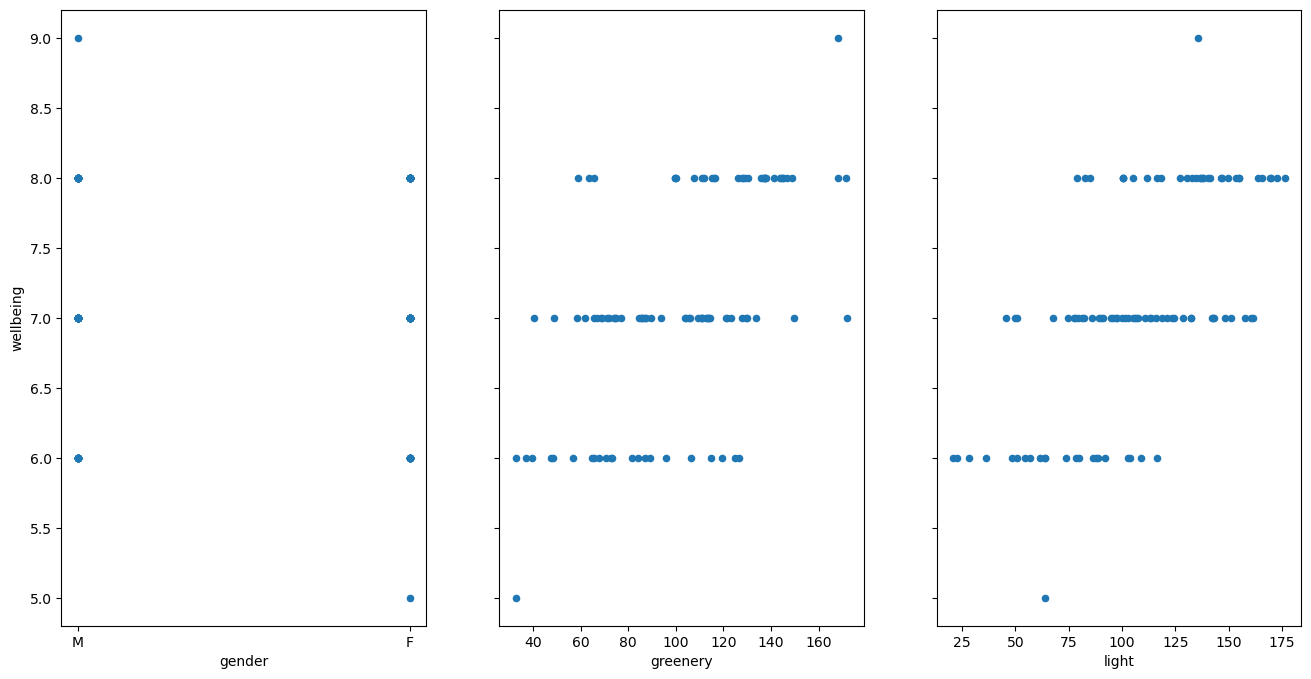

In [18]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df_office.plot(kind='scatter', x='gender', y='wellbeing', ax=axs[0], figsize=(16, 8))
df_office.plot(kind='scatter', x='greenery', y='wellbeing', ax=axs[1])
df_office.plot(kind='scatter', x='light', y='wellbeing', ax=axs[2])

### Correlation coefficients

In [19]:
# what is the Pearson correlation between all pairs of numerical variables in this dataset?

# use if statement to check pd version. If it is after version 2.1, we can use the following code to get the correlation matrix: df_office.corr(numeric_only=True). Otherwise, use df_office.corr()
# in pandas version 2.1.0, the parameter numeric_only is added to the corr() function and is default at false. This parameter is used to specify whether to use only numeric columns to calculate the correlation matrix. If set to True, only numeric columns will be used. If set to False, all columns will be used.
if pd.__version__ >= '2.0.0':
    print(df_office.corr(numeric_only=True))
else:
    print(df_office.corr())


           greenery     light  wellbeing
greenery   1.000000  0.009559   0.587567
light      0.009559  1.000000   0.640688
wellbeing  0.587567  0.640688   1.000000


Text(0.5, 1.0, 'Correlation Matrix')

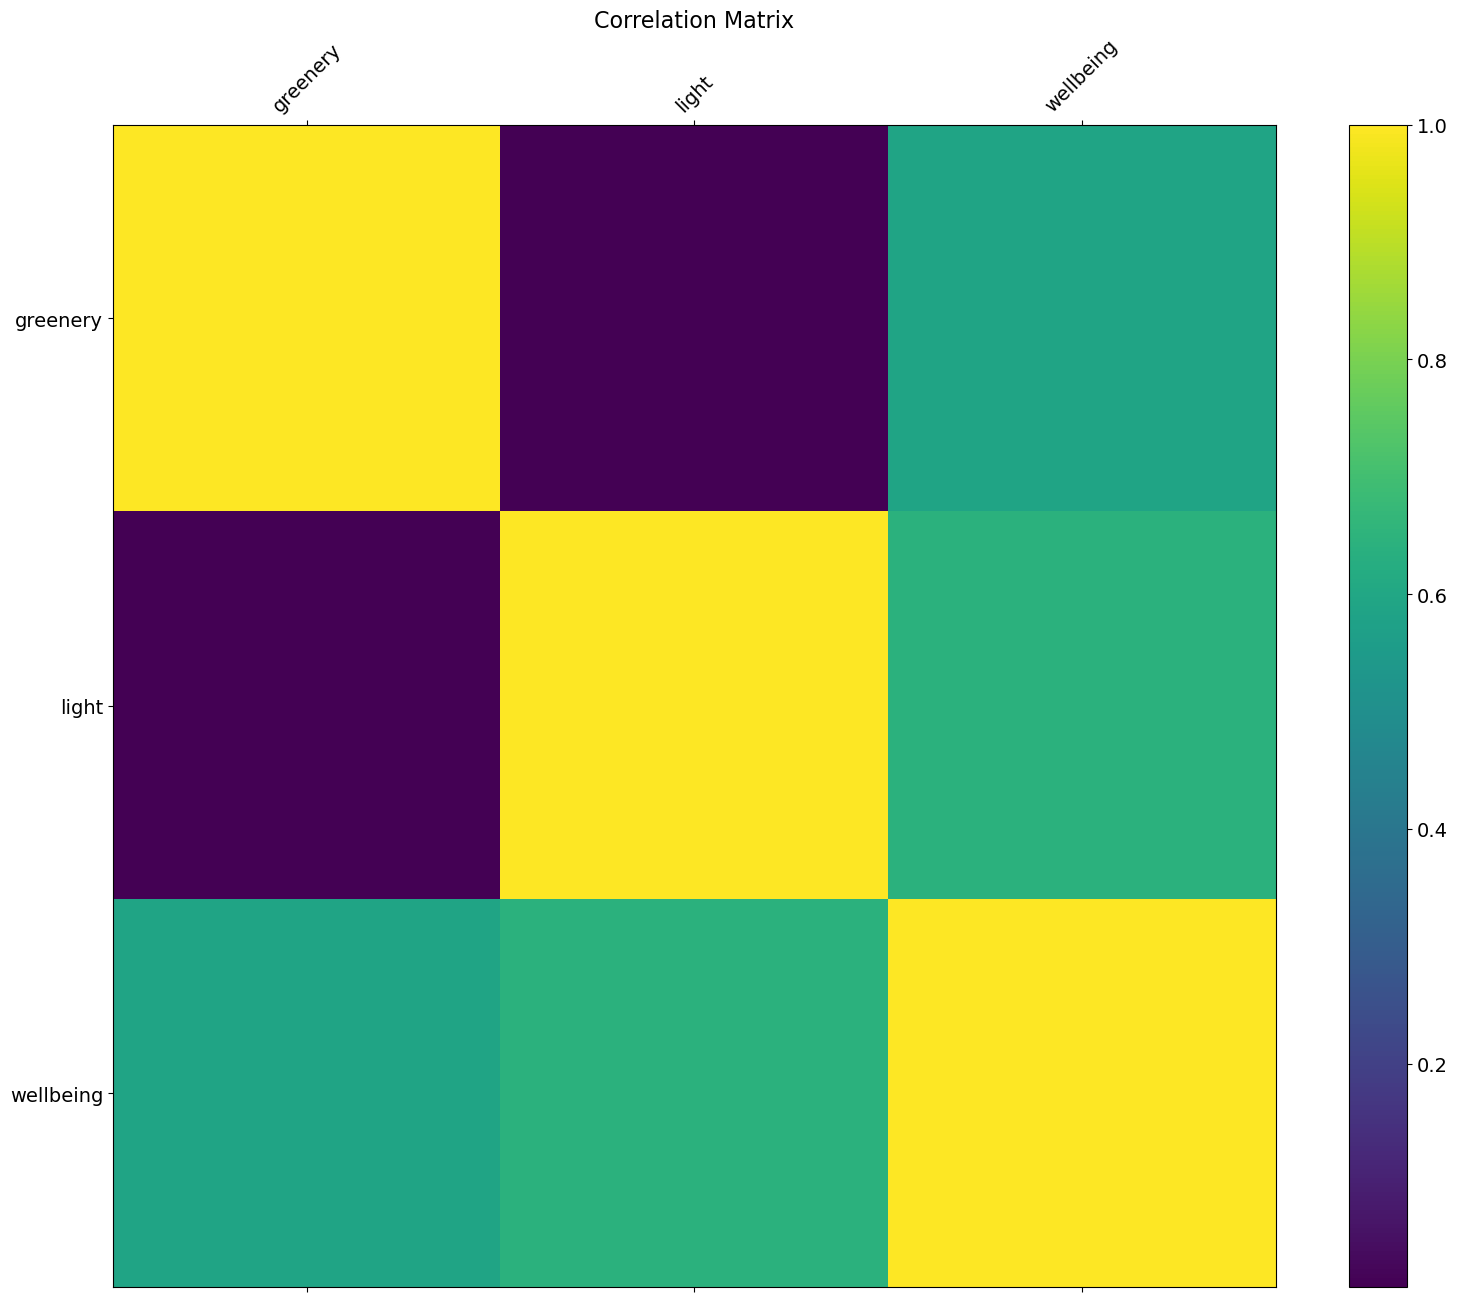

In [20]:
# You can also plot the correlation matrix
# only for numeric variables
# reference: https://stackoverflow.com/a/29432741/4667568
f = plt.figure(figsize=(19, 15)) # creates a new figure, sets length and width
plt.matshow(df_office.corr(numeric_only=True), fignum=f.number) # matshow - creates matrix plot for df_office.corr(), fignum - assigned number for when there is multiple figures plotted
# if you are using pandas 1.*, use the following code to replace the above line
# plt.matshow(df_office.corr(), fignum=f.number)
plt.xticks(range(df_office.select_dtypes(['number']).shape[1]), df_office.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(df_office.select_dtypes(['number']).shape[1]), df_office.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title

Pandas provides three methods of correlation: Pearson, Spearman, and Kendall. By default, it uses **Pearson correlation**.

You might have noted that the gender column is excluded in the result above. This is because Pandas only computes the correlation for numeric variables.

See [the documentation](https://pandas.pydata.org/pandas-docs/version/1.4/reference/api/pandas.DataFrame.corr.html).

## Part 3: build a simple regression model

In [21]:
# This performs a multiple regression of wellbeing against greenery:

reg_wb_green = smf.ols(formula='wellbeing ~ greenery',data=df_office).fit()

# And this gives a big summary of the results:
print(reg_wb_green.summary())

                            OLS Regression Results                            
Dep. Variable:              wellbeing   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     51.67
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.31e-10
Time:                        15:21:57   Log-Likelihood:                -96.005
No. Observations:                 100   AIC:                             196.0
Df Residuals:                      98   BIC:                             201.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7057      0.204     27.941      0.0

Note that the **reg_wb_green** model contains a lot of information of the regression models (see [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) for a full list), including:

- params: the coefficients of intercept and gradients (or slopes)
- rsqured
- pvalues
- fittedvalues: the fitted y values
- resid: residuals


In [22]:
# Pick out some values of interest and print the regression equation: y=mx+c or y=beta_1*x + beta_0

# The order of results: intercept term, slope term
beta_0, beta_1 = reg_wb_green.params
rsq    = reg_wb_green.rsquared
pval_0, pval_1 = reg_wb_green.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of greenery = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = 0.014 x + 5.706
R^2 =  0.34523516578160884
p-value of greenery =  0.0
p-value of intercept =  0.0


y = 0.014 x + 5.706
Rsq =  0.34523516578160884
p-value of greenery =  1.3075485893765913e-10


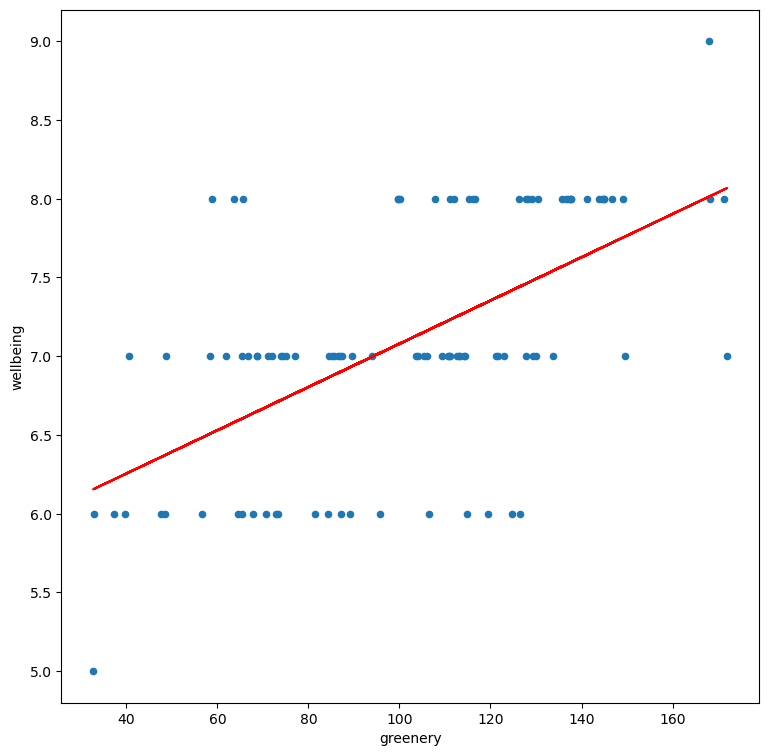

In [23]:
# plot the result
fig, ax = plt.subplots()
df_office.plot(kind='scatter', x='greenery', y='wellbeing', figsize=(9, 9), ax = ax)

X=df_office.greenery
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of greenery = ", pval_1)

### Interpreting Model Coefficients
How do we interpret the greenery coefficient (0.0137)?

A unit increase in greenery is associated with a 0.0137 "unit" increase in well-being.

Or more clearly: An additional 1 unit improvement in greenery is associated with an increase in subjective well-being in relation to the office of 0.0137 units.

The greener the office, the high level of well being. 

Do you think it make sense?

### Making predictions

Let's say that there is a new office where the greenery index is 150. What would we predict for the well being in this office?

In [24]:
# manually calculate the prediction
beta_1*150 + beta_0

7.765793823039568

Thus, we would predict well being of 7.766 in that office.

Of course, we can also use Statsmodels to make the prediction:

In [25]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'greenery': [150]})
X_new.head()

,greenery
0,150


In [26]:
# use the model to make predictions on a new value
reg_wb_green.predict(X_new)

0    7.765794
dtype: float64

### How Well Does the Model Fit the data?

The most common way to evaluate the overall fitness of a linear model is by the R-squared value. 

R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.


In [27]:
# what is the R squared value for the model？You can find the answer from the code above.

reg_wb_green.rsquared

0.34523516578160884

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. 

Therefore, it's most useful as a tool for comparing different models.

### The LINE conditions of linear regression

Now, we can conduct residual analysis and test the following **LINE** conditions using **Residual vs. Fitted plot**:

- Linear relationship
- Independent errors
- Normally distributed errors
- Equal variance for all x values

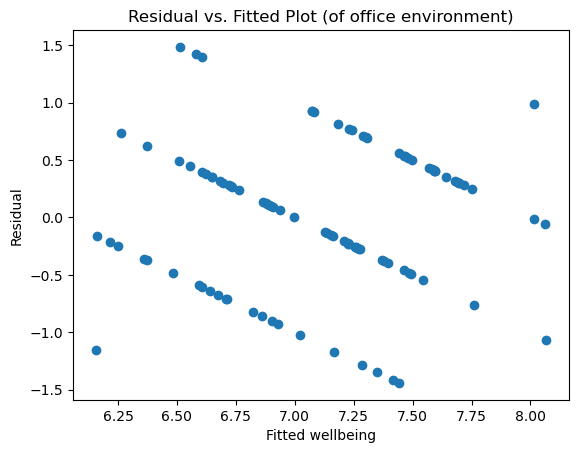

In [28]:
# plot 
plt.scatter(reg_wb_green.fittedvalues, reg_wb_green.resid)
# adding title and labels
plt.xlabel('Fitted wellbeing')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (of office environment)')
plt.show()

Now, we can discuss the LINE conditions and outliers:

- Linear relationship between x and y? Roughly yes (from the scatterplot of x and y, see above), but not obvious.
- Independent errors? To some extent. (see below for Durbin-Watson test statistic)
- Normally distributed residuals? This is likely true, as there are more points closer to residual of 0. (see below for Jarque-Bera test)
- Equal variance for all fitted y values? This is likely true.

- Outliers? No.

### Hypothesis testing of the LINE conditions

This part is optional - and we will know more about these hypothesis tests in a following lecture on *Hypothesis Testing*.

In [29]:
# The Durbin-Watson test statistic is to test the correlation of the residuals - are they independent?
# The null hypothesis of the test is that there is no serial correlation in the residuals
# The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. 
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. 
# The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

statsmodels.stats.stattools.durbin_watson(reg_wb_green.resid)


2.123422462323803

The [Durbin-Watson test](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html#statsmodels.stats.stattools.durbin_watson) result above shows that the serial correlation between the residuals are unlikely.

In [30]:
# The Jarque-Bera test statistic (JB) tests the null that the data is normally distributed against an alternative that the data follow some other distribution. 
# The test statistic is based on two moments of the data, the skewness, and the kurtosis, and has an asymptotic chi-squared distribution.
# The test statistic of the JB test is always a positive number. If it's far from zero, it indicates that the sample data do not have a normal distribution.

statsmodels.stats.stattools.jarque_bera(reg_wb_green.resid)

(0.8263757642404426,
 0.6615379799927861,
 -0.18066990922142118,
 2.739685346118587)

The Jarque-Bera test above returns four values. The first two values are the JB test statistic and the p-value of the test statistic.

As the JB test statistic is quite close to 0 and the p value is greater than 0.05 (the common threshold of p value), it indicates that the residuals of this model are likely to follow a normal distribution.

More details can be found [here](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html#statsmodels.stats.stattools.jarque_bera).

## Part 4:

We have provided a few additional datasets on Moodle.

Can you use the above code to investigate one or more additional datasets and interpret the results?

[This notebook](https://raw.githubusercontent.com/huanfachen/QM_2024/main/practicals/Practical_03_regression_ad_data.ipynb) provides another example of using regression to investigating a dataset relating to advertisement.

## Credits
### Contributors:
The following individuals have contributed to these teaching materials: [Huanfa Chen](huanfa.chen@ucl.ac.uk)

### License
These teaching materials are licensed under a mix of The MIT License and the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license.

### Acknowledgements
This notebook is adjusted from [this linear regression tutorial](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb).

### Dependencies
This notebook depends on the following libraries: pandas, matplotlib, statsmodels